In [6]:
import pandas as pd
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import uniform
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [97]:
df3=pd.read_excel("worksheet_combined.xlsx")
df3['is_timed']=0
df3

,question_type,question_number,correct_answer,Student_ID,Response,Date_Completed,is_right,difficulty_index,Birthday,Age_years,Age_months,new_id,genre,title,percentage_correct,total_correct,Date_Completed_year,is_timed
0,M,1,A,15,A,2022-03-14,1,1.00,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0
1,M,2,B,15,B,2022-03-14,1,0.89,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0
2,"M, T/F",3,C,15,C,2022-03-14,1,0.89,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0
3,M,4,A,15,A,2022-03-14,1,1.00,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0
4,M,5,B,15,B,2022-03-14,1,0.78,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572,NaN,9,C,21,D,2022-04-27,0,0.67,2013-03-30,9,1,21|2022-04-27,fiction,wizard,0.692308,9/13,2022,0
6573,NaN,10,C,21,C,2022-04-27,1,0.50,2013-03-30,9,1,21|2022-04-27,fiction,wizard,0.692308,9/13,2022,0
6574,NaN,11,A,21,A,2022-04-27,1,0.83,2013-03-30,9,1,21|2022-04-27,fiction,wizard,0.692308,9/13,2022,0
6575,NaN,12,B,21,B,2022-04-27,1,0.33,2013-03-30,9,1,21|2022-04-27,fiction,wizard,0.692308,9/13,2022,0


In [98]:
df2=pd.read_excel("Mock exam data combined.xlsx")
df2['is_timed']=1
df2


,question_type,question_number,correct_answer,Student_ID,Response,Date_Completed,is_right,difficulty_index,Birthday,Age_years,Age_months,new_id,genre,title,percentage_correct,total_correct,Date_Completed_year,is_timed
0,H,1,D,61,C,2020-08-30,0,0.31,2010-05-05,10,4,61|2020-08-30,poem,bluebird,0.7200,18/25,2020,1
1,M,2,D,61,D,2020-08-30,1,0.56,2010-05-05,10,4,61|2020-08-30,poem,bluebird,0.7200,18/25,2020,1
2,G,3,B,61,B,2020-08-30,1,0.78,2010-05-05,10,4,61|2020-08-30,poem,bluebird,0.7200,18/25,2020,1
3,M,4,D,61,C,2020-08-30,0,0.19,2010-05-05,10,4,61|2020-08-30,poem,bluebird,0.7200,18/25,2020,1
4,M,5,B,61,B,2020-08-30,1,0.72,2010-05-05,10,4,61|2020-08-30,poem,bluebird,0.7200,18/25,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,H,13,A,33,A,2020-08-07,1,0.39,2010-03-10,10,5,33|2020-08-07,poem,those winter,0.7059,12/17,2020,1
4338,V,14,C,33,C,2020-08-07,1,0.17,2010-03-10,10,5,33|2020-08-07,poem,those winter,0.7059,12/17,2020,1
4339,H,15,D,33,D,2020-08-07,1,0.39,2010-03-10,10,5,33|2020-08-07,poem,those winter,0.7059,12/17,2020,1
4340,H,16,A,33,A,2020-08-07,1,0.44,2010-03-10,10,5,33|2020-08-07,poem,those winter,0.7059,12/17,2020,1


<h4>Students Performance Trend<h4>

<Axes: title={'center': 'Performance Trend (MOCK EXAMS)'}, xlabel='question_type', ylabel='% correct responses'>

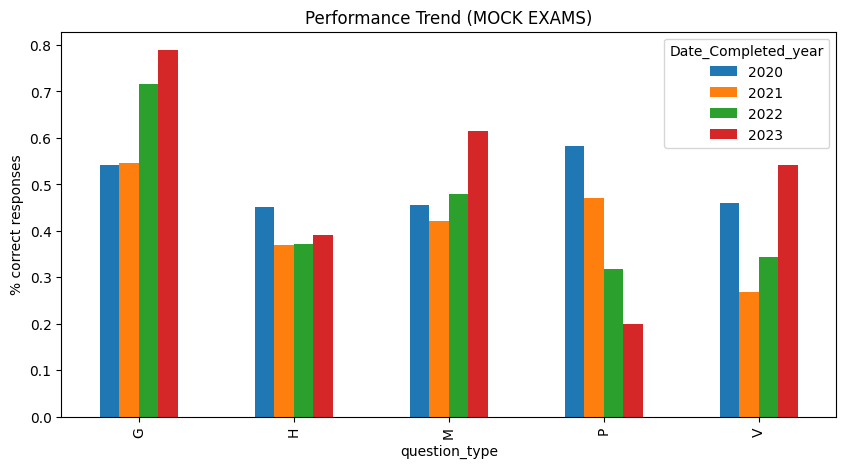

In [45]:
df2.groupby(['question_type','Date_Completed_year'])['is_right'].mean().unstack().plot(kind='bar',figsize=(10,5),
                                                                                      ylabel="% correct responses",title='Performance Trend (MOCK EXAMS)')




The bar chart illustrates a noticeable decline in student performance for questions related to understanding the author's intent (P) and inferring information from the text (H). Conversely, there's a marked improvement in student performance for questions centered around grammar (G) and factual recall (M). 

In [135]:
#  analysing each student's comprehensive ability in terms of factual recall, inference, SPaG (spelling, punctuation and grammar), vocabulary, purpose

# using the percentage of correct responses for each question type in the mock exams of each student.
student_ca2=df2.pivot_table(index=['Student_ID','Date_Completed_year'],columns='question_type',values='is_right',aggfunc='mean')
student_ca2.reset_index(inplace=True)
student_ca2.rename(columns={'G':'Grammar','M':'Factual_Recall_score','H':'Inference_score','P':'purpose_score','V':'vocabulary_score'},inplace=True)
student_ca2=student_ca2.round(2)
student_ca2



question_type,Student_ID,Date_Completed_year,Grammar,Inference_score,Factual_Recall_score,purpose_score,vocabulary_score
0,1,2020,0.55,0.52,0.51,0.80,0.62
1,1,2021,0.43,0.31,0.31,0.50,0.33
2,1,2022,0.71,0.31,0.67,0.50,0.33
3,1,2023,0.88,0.44,0.76,0.33,0.50
4,2,2022,1.00,0.00,0.29,0.00,0.00
...,...,...,...,...,...,...,...
63,73,2021,1.00,0.25,0.14,0.00,0.20
64,74,2023,0.33,0.25,0.29,0.00,0.40
65,75,2023,1.00,0.00,0.29,0.00,0.40
66,76,2023,0.67,0.00,0.29,0.00,0.20


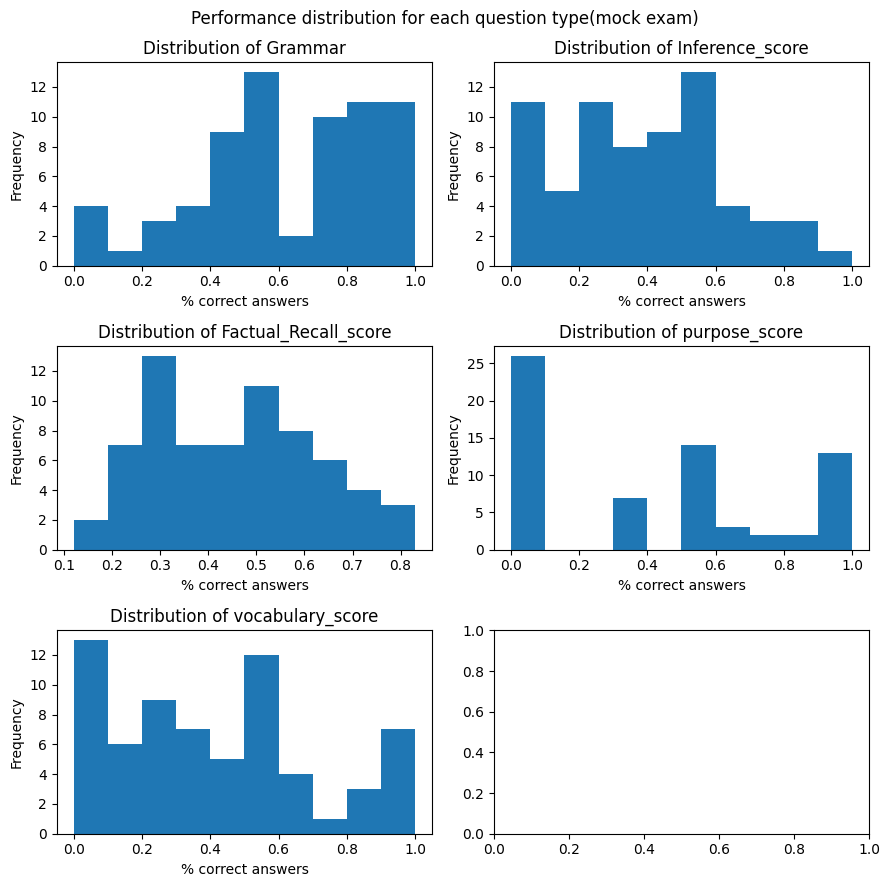

In [136]:
column_names=student_ca2.columns.to_list()[2:]
num_columns=len(column_names)
num_rows = (num_columns + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(9, 3 * num_rows))
fig.suptitle('Performance distribution for each question type(mock exam)')

for i, column in enumerate(column_names):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    ax.hist(student_ca2[column], bins=10)  # Adjust 'bins' for desired granularity
    ax.set_xlabel('% correct answers')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {column}')


plt.tight_layout()
plt.show()






<h4> ATOS (Advantage-TASA Open Standard)<h4>

ATOS is a measure of readability. ATOS takes into account the most important predictors of text  complexity duch as avrrage sentence length, average word length and word difficulty level,
The ATOS level for each comprehension passage was calculated using the free ATOS analyzer tool provided by Renaissance Learning's Accelerated Reader (AR) program, which is one of the primary sources for ATOS level information. ([Tool link](https://www.renaissance.com/resources/atos-analyzer/atos-analyzer-tool/#atos_form_section))


In [148]:
atos_level=pd.read_csv("ATOS level.csv")
atos_level

,title,ATOS level,word_count
0,bluebird,6.44,191
1,dorian,3.80,988
2,the hobbit,6.17,701
3,jane eyre,7.09,971
4,metamorphosis,6.55,596
...,...,...,...
60,voyage,9.63,444
61,war of the worlds,8.64,555
62,when you are old,8.00,116
63,wind in the willows,8.35,435


In [152]:
data=pd.concat([df3,df2])
data['genre'].replace({'NON-fiction':'non-fiction','fiction book but passage seems non-fiction':'non-fiction'},inplace=True)
data=pd.merge(data,atos_level,on='title')
data

,question_type,question_number,correct_answer,Student_ID,Response,Date_Completed,is_right,difficulty_index,Birthday,Age_years,Age_months,new_id,genre,title,percentage_correct,total_correct,Date_Completed_year,is_timed,ATOS level,word_count
0,M,1,A,15,A,2022-03-14,1,1.00,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0,8.27,614
1,M,2,B,15,B,2022-03-14,1,0.89,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0,8.27,614
2,"M, T/F",3,C,15,C,2022-03-14,1,0.89,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0,8.27,614
3,M,4,A,15,A,2022-03-14,1,1.00,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0,8.27,614
4,M,5,B,15,B,2022-03-14,1,0.78,2012-08-26,9,6,15|2022-03-14,fiction,1984_passage,0.615385,8/13,2022,0,8.27,614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10914,M,14,D,59,B,2023-05-31,0,0.29,2013-07-17,9,10,59|2023-05-31,fiction,the hobbit,0.722200,13/18,2023,1,6.17,701
10915,H,15,D,59,B,2023-05-31,0,0.00,2013-07-17,9,10,59|2023-05-31,fiction,the hobbit,0.722200,13/18,2023,1,6.17,701
10916,M,16,B,59,B,2023-05-31,1,0.86,2013-07-17,9,10,59|2023-05-31,fiction,the hobbit,0.722200,13/18,2023,1,6.17,701
10917,M,17,D,59,D,2023-05-31,1,0.71,2013-07-17,9,10,59|2023-05-31,fiction,the hobbit,0.722200,13/18,2023,1,6.17,701


In [153]:
data.shape

(10919, 20)

In [154]:
data.is_right.value_counts()

is_right
1    5653
0    5266
Name: count, dtype: int64

<h3> Feature engineering

In [155]:
new_df=pd.get_dummies(data,columns=['genre'],dtype=int)
new_df

,question_type,question_number,correct_answer,Student_ID,Response,Date_Completed,is_right,difficulty_index,Birthday,Age_years,...,percentage_correct,total_correct,Date_Completed_year,is_timed,ATOS level,word_count,genre_fiction,genre_letter,genre_non-fiction,genre_poem
0,M,1,A,15,A,2022-03-14,1,1.00,2012-08-26,9,...,0.615385,8/13,2022,0,8.27,614,1,0,0,0
1,M,2,B,15,B,2022-03-14,1,0.89,2012-08-26,9,...,0.615385,8/13,2022,0,8.27,614,1,0,0,0
2,"M, T/F",3,C,15,C,2022-03-14,1,0.89,2012-08-26,9,...,0.615385,8/13,2022,0,8.27,614,1,0,0,0
3,M,4,A,15,A,2022-03-14,1,1.00,2012-08-26,9,...,0.615385,8/13,2022,0,8.27,614,1,0,0,0
4,M,5,B,15,B,2022-03-14,1,0.78,2012-08-26,9,...,0.615385,8/13,2022,0,8.27,614,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10914,M,14,D,59,B,2023-05-31,0,0.29,2013-07-17,9,...,0.722200,13/18,2023,1,6.17,701,1,0,0,0
10915,H,15,D,59,B,2023-05-31,0,0.00,2013-07-17,9,...,0.722200,13/18,2023,1,6.17,701,1,0,0,0
10916,M,16,B,59,B,2023-05-31,1,0.86,2013-07-17,9,...,0.722200,13/18,2023,1,6.17,701,1,0,0,0
10917,M,17,D,59,D,2023-05-31,1,0.71,2013-07-17,9,...,0.722200,13/18,2023,1,6.17,701,1,0,0,0


In [156]:
new_df.shape

(10919, 23)

In [157]:
# building a model to predict whether a student will answer a question correctly or not
X=new_df.drop(columns=['Response','correct_answer','Date_Completed','Date_Completed_year','Birthday','title','Student_ID','question_number','question_type','is_right','new_id','total_correct'])
y=new_df['is_right']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)




In [158]:
X

,difficulty_index,Age_years,Age_months,percentage_correct,is_timed,ATOS level,word_count,genre_fiction,genre_letter,genre_non-fiction,genre_poem
0,1.00,9,6,0.615385,0,8.27,614,1,0,0,0
1,0.89,9,6,0.615385,0,8.27,614,1,0,0,0
2,0.89,9,6,0.615385,0,8.27,614,1,0,0,0
3,1.00,9,6,0.615385,0,8.27,614,1,0,0,0
4,0.78,9,6,0.615385,0,8.27,614,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10914,0.29,9,10,0.722200,1,6.17,701,1,0,0,0
10915,0.00,9,10,0.722200,1,6.17,701,1,0,0,0
10916,0.86,9,10,0.722200,1,6.17,701,1,0,0,0
10917,0.71,9,10,0.722200,1,6.17,701,1,0,0,0


In [159]:
X.isna().sum()

difficulty_index      0
Age_years             0
Age_months            0
percentage_correct    0
is_timed              0
ATOS level            0
word_count            0
genre_fiction         0
genre_letter          0
genre_non-fiction     0
genre_poem            0
dtype: int64

In [160]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8735, 11), (8735,), (2184, 11), (2184,))

In [161]:
# code to build a pipeline to scale the data and then fit a support vector machine model
svm=Pipeline([('scaler',StandardScaler()),('svc',SVC())])
svm.fit(X_train,y_train)



Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [162]:
y_pred=svm.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))



Accuracy score: 0.7637362637362637
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      1046
           1       0.79      0.75      0.77      1138

    accuracy                           0.76      2184
   macro avg       0.76      0.76      0.76      2184
weighted avg       0.77      0.76      0.76      2184



Text(0.5, 1.0, 'Confusion Matrix for SVM model')

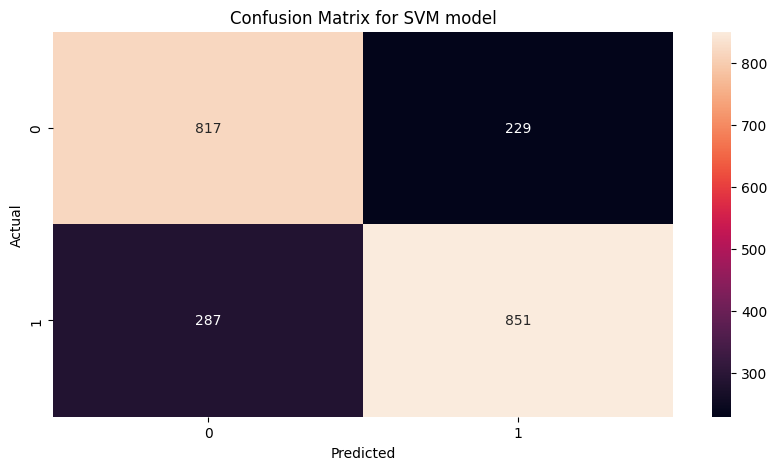

In [163]:
# code to plot the confusion matrix for the SVM model
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM model')